In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import datetime
datetime.datetime.strptime("2013-1-25", '%Y-%m-%d').strftime('%m/%d/%y')

'01/25/13'

In [2]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import random
from keras import regularizers

Using TensorFlow backend.


In [3]:
#Reading the features data file
data=pd.read_excel('BTC_data_final.xlsx')

In [4]:
data_base = pd.DataFrame(data.iloc[:,1:].values, index = data.Date, columns = ["Price","Bitcoin_lag_daily_Returns",
                                                  "Daily_Transaction_Volume","Price_volatility","Transaction_Fees",
                                                  "Hash_rate", "Google_trend", "Money_supply", "MACD_Histogram",
                                                "lag_Returns S&P 500","vix","Dollar index","Gold",
                                                "2_yr_yield", "10_yr_yield","Rip_price"])
data_base.head(5)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,vix,Dollar index,Gold,2_yr_yield,10_yr_yield,Rip_price
Date,,,,,,,,,,,,,,,,
2010-01-01,0.0,0.0,138.0,0.0,0.0,0.000008,0.5,1624700.0,0.0,0.000000,22.59,77.529999,1087.50,1.09,3.85,0.0
2010-01-02,0.0,0.0,134.0,0.0,0.0,0.000008,0.5,1631300.0,0.0,0.000000,22.59,77.529999,1087.50,1.09,3.85,0.0
2010-01-03,0.0,0.0,126.0,0.0,0.0,0.000007,0.5,1637600.0,0.0,0.000000,19.26,77.529999,1087.50,1.09,3.85,0.0
2010-01-04,0.0,0.0,186.0,0.0,0.0,0.000007,0.5,1646900.0,0.0,0.000000,17.47,77.529999,1121.50,1.09,3.85,0.0
2010-01-05,0.0,0.0,183.0,0.0,0.0,0.000008,0.5,1655950.0,0.0,0.003116,17.47,77.620003,1123.25,1.01,3.77,0.0


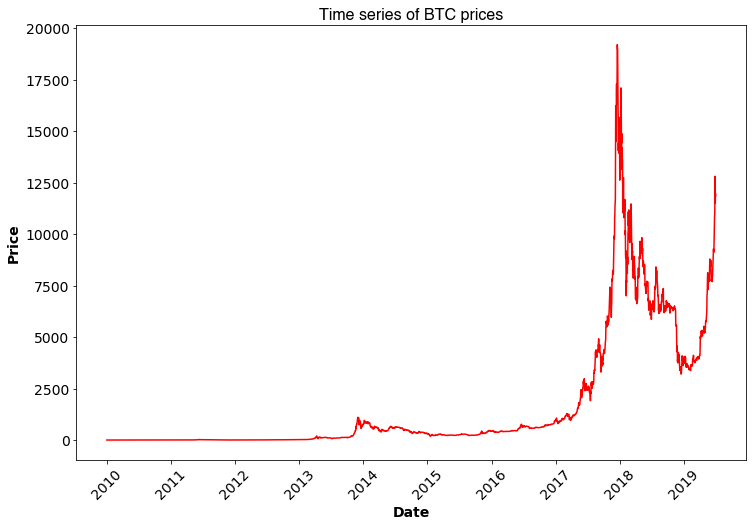

In [5]:
# Time series of BTC prices
# A line plot

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

plt.figure(figsize=(12,8))
plt.plot(data_base.index, data_base['Price'].values, 'r-')

# Label the axes
plt.xlabel('Date',fontsize = 14, fontweight='bold')
plt.ylabel('Price',fontsize = 14, fontweight='bold')

plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

#label the figure
plt.title('Time series of BTC prices', fontsize = 16, fontweight='bold', **hfont)

plt.show()

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

labels = data_base["Price"].values
maxima = max(labels)
minima = min(labels)

labels=(labels-minima)/(maxima-minima)
scaler=MinMaxScaler()
scaler.fit(data_base)
data_base_norm=scaler.transform(data_base)

data_base_norm = pd.DataFrame(data_base_norm, index = data_base.index, columns = ["Price","Bitcoin_lag_daily_Returns",
                                                  "Daily_Transaction_Volume","Price_volatility","Transaction_Fees",
                                                  "Hash_rate", "Google_trend", "Money_supply", "MACD_Histogram",
                                                "lag_Returns S&P 500","vix","Dollar index","Gold",
                                                "2_yr_yield", "10_yr_yield","Rip_price"])
data_base_norm.head(5)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,vix,Dollar index,Gold,2_yr_yield,10_yr_yield,Rip_price
Date,,,,,,,,,,,,,,,,
2010-01-01,0.0,0.359308,0.000052,0.0,0.0,1.484422e-14,0.0,0.000000,0.399392,0.573307,0.346114,0.151515,0.045057,0.329787,0.939394,0.0
2010-01-02,0.0,0.359308,0.000044,0.0,0.0,1.290306e-14,0.0,0.000408,0.399392,0.573307,0.346114,0.151515,0.045057,0.329787,0.939394,0.0
2010-01-03,0.0,0.359308,0.000028,0.0,0.0,7.422111e-15,0.0,0.000798,0.399392,0.573307,0.260422,0.151515,0.045057,0.329787,0.939394,0.0
2010-01-04,0.0,0.359308,0.000149,0.0,0.0,9.591652e-15,0.0,0.001373,0.399392,0.573307,0.214359,0.151515,0.085265,0.329787,0.939394,0.0
2010-01-05,0.0,0.359308,0.000143,0.0,0.0,1.461585e-14,0.0,0.001933,0.399392,0.600114,0.214359,0.154480,0.087334,0.301418,0.909091,0.0


In [7]:
# MAking train, validation adn test set

train_data =data_base_norm.loc[data_base_norm.index<='2018-06-30']
validation_data =data_base_norm.loc[(data_base_norm.index>'2018-06-30')&(data_base_norm.index<='2018-12-31')]
test_data =data_base_norm.loc[data_base_norm.index>'2018-12-31']
labels_train=train_data["Price"].values
labels_val = validation_data["Price"].values
labels_test = test_data["Price"].values
#train_data = train_data.drop(["Price"], axis = 1)
#validation_data = validation_data.drop(["Price"], axis = 1)
#test_data = test_data.drop(["Price"], axis = 1)

In [8]:
# data generator

#Length of Features 
P = 16
#length of look back
k = 30
#Length of Testing Dataset/Length of Walk-Forward Window
n = 1

def generate_data_rnn(features,labels,n = 1,k = 30):
    #takes the number of rows
    L=features.shape[0]
    # number of iterations to be done through the training data
    M = L-k-n+1
    train_data=[]
    train_labs=[]
    
    for j in range(M):
        # take features from nth row to (n+28-1)th row
        New_Data = features[j:j+k, ]
        # append it as one sample of features of data
        train_data.append(New_Data)
        # prices to be predicted are from n+28 to n+28+7-1 th values
        New_labels=labels[j+k:j+k+n ]
        train_labs.append(New_labels)
        
        
    return([train_data,train_labs])

In [9]:
tr=generate_data_rnn(np.array(train_data),labels_train,n,k)
val=generate_data_rnn(np.array(validation_data),labels_val,n,k)
test_dat=generate_data_rnn(np.array(test_data),labels_test,n,k)

In [10]:
def plot_val_train_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize= (10,8))
    
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.ylabel('Loss',fontsize = 14, fontweight='bold')
    plt.xlabel('Number of epochs',fontsize = 14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc = 'upper right', prop={'size': 14})
    #plt.title('Training and validation loss')
    
    #plt.legend()

    plt.show()

# Simple Neural Network

In [11]:
#from keras.layers import Dense
mod_simple=Sequential()

mod_simple.add(Dense(input_shape=(k,P),units = 25, activation='tanh',bias_initializer='zeros',
                     kernel_regularizer = regularizers.l2(0.0)))
mod_simple.add(keras.layers.Flatten())
#mod_simple.add(Dense(input_shape=(k,P),units=100, activation='relu',bias_initializer='zeros',kernel_regularizer = None)
#mod_simple.add(keras.layers.Dropout(0.1, noise_shape=None, seed=None))

mod_simple.add(Dense(n,activation='tanh'))


In [12]:
mod_simple.compile(optimizer='adam', loss='mae')
mod_simple.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30, 25)            425       
_________________________________________________________________
flatten_1 (Flatten)          (None, 750)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 751       
Total params: 1,176
Trainable params: 1,176
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist_snn = mod_simple.fit(np.array(tr[0]),np.array(tr[1]),epochs = 50,batch_size = 150,
        validation_data=(np.array(val[0]),np.array(val[1])))

Train on 3073 samples, validate on 154 samples
Epoch 1/50
3073/3073 [==============================] - 0s 89us/step - loss: 0.1457 - val_loss: 0.1846
Epoch 2/50
3073/3073 [==============================] - 0s 13us/step - loss: 0.0690 - val_loss: 0.0828
Epoch 3/50
3073/3073 [==============================] - 0s 16us/step - loss: 0.0463 - val_loss: 0.0884
Epoch 4/50
3073/3073 [==============================] - 0s 30us/step - loss: 0.0383 - val_loss: 0.0457
Epoch 5/50
3073/3073 [==============================] - 0s 19us/step - loss: 0.0351 - val_loss: 0.0550
Epoch 6/50
3073/3073 [==============================] - 0s 15us/step - loss: 0.0315 - val_loss: 0.0551
Epoch 7/50
3073/3073 [==============================] - 0s 15us/step - loss: 0.0309 - val_loss: 0.0383
Epoch 8/50
3073/3073 [==============================] - 0s 13us/step - loss: 0.0298 - val_loss: 0.0707
Epoch 9/50
3073/3073 [==============================] - 0s 18us/step - loss: 0.0278 - val_loss: 0.0860
Epoch 10/50
3073/3073 [===

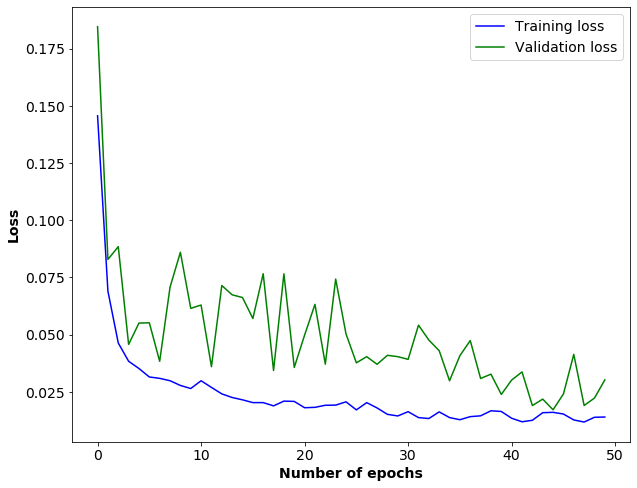

In [14]:
plot_val_train_loss(hist_snn)

# RNN with an LSTM layer

In [15]:
mod=Sequential()
mod.add(keras.layers.LSTM(input_shape=(k,P),units=25, activation='tanh',dropout=0.0, recurrent_dropout=0.0,
                       bias_initializer='zeros',kernel_regularizer = regularizers.l2(0.0)))
mod.add(Dense(n,activation='tanh'))


In [16]:
mod.compile(optimizer='adam', loss='mae')
mod.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25)                4200      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist_lstm = mod.fit(np.array(tr[0]),np.array(tr[1]),epochs = 50,batch_size = 150,
        validation_data=(np.array(val[0]),np.array(val[1])))

Train on 3073 samples, validate on 154 samples
Epoch 1/50
3073/3073 [==============================] - 1s 384us/step - loss: 0.0588 - val_loss: 0.1443
Epoch 2/50
3073/3073 [==============================] - 0s 152us/step - loss: 0.0282 - val_loss: 0.1145
Epoch 3/50
3073/3073 [==============================] - 0s 135us/step - loss: 0.0154 - val_loss: 0.1680
Epoch 4/50
3073/3073 [==============================] - 0s 122us/step - loss: 0.0129 - val_loss: 0.1448
Epoch 5/50
3073/3073 [==============================] - 0s 123us/step - loss: 0.0112 - val_loss: 0.1202
Epoch 6/50
3073/3073 [==============================] - 0s 123us/step - loss: 0.0102 - val_loss: 0.1028
Epoch 7/50
3073/3073 [==============================] - 0s 123us/step - loss: 0.0093 - val_loss: 0.1044
Epoch 8/50
3073/3073 [==============================] - 0s 127us/step - loss: 0.0087 - val_loss: 0.0891
Epoch 9/50
3073/3073 [==============================] - 0s 128us/step - loss: 0.0078 - val_loss: 0.0850
Epoch 10/50
3073/

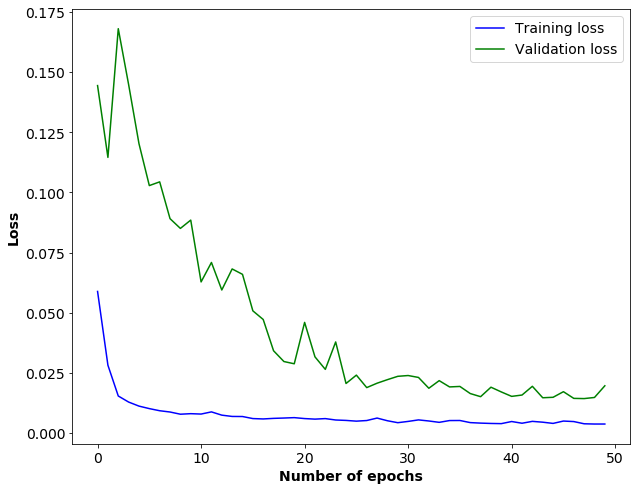

In [18]:
plot_val_train_loss(hist_lstm)

In [19]:
predicted_lstm=mod.predict(np.array(val[0]))

# RNN with a GRU layer

In [20]:
mod2=Sequential()
mod2.add(keras.layers.GRU(input_shape=(k,P),units = 50, activation='tanh',bias_initializer='zeros',
                          kernel_regularizer = regularizers.l2(0.0)))
mod2.add(Dense(n,activation='tanh'))


In [21]:
mod2.compile(optimizer='adam', loss='mae')
mod2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50)                10050     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist_rnn = mod2.fit(np.array(tr[0]),np.array(tr[1]),epochs = 50, batch_size = 125,
        validation_data=(np.array(val[0]),np.array(val[1])))

Train on 3073 samples, validate on 154 samples
Epoch 1/50
3073/3073 [==============================] - 2s 515us/step - loss: 0.1830 - val_loss: 0.0579
Epoch 2/50
3073/3073 [==============================] - 1s 203us/step - loss: 0.0436 - val_loss: 0.1588
Epoch 3/50
3073/3073 [==============================] - 1s 207us/step - loss: 0.0204 - val_loss: 0.1517
Epoch 4/50
3073/3073 [==============================] - 1s 198us/step - loss: 0.0134 - val_loss: 0.1304
Epoch 5/50
3073/3073 [==============================] - 1s 204us/step - loss: 0.0101 - val_loss: 0.1213
Epoch 6/50
3073/3073 [==============================] - 1s 218us/step - loss: 0.0098 - val_loss: 0.0882
Epoch 7/50
3073/3073 [==============================] - 1s 268us/step - loss: 0.0085 - val_loss: 0.0693
Epoch 8/50
3073/3073 [==============================] - 1s 231us/step - loss: 0.0094 - val_loss: 0.0551
Epoch 9/50
3073/3073 [==============================] - 1s 207us/step - loss: 0.0079 - val_loss: 0.0608
Epoch 10/50
3073/

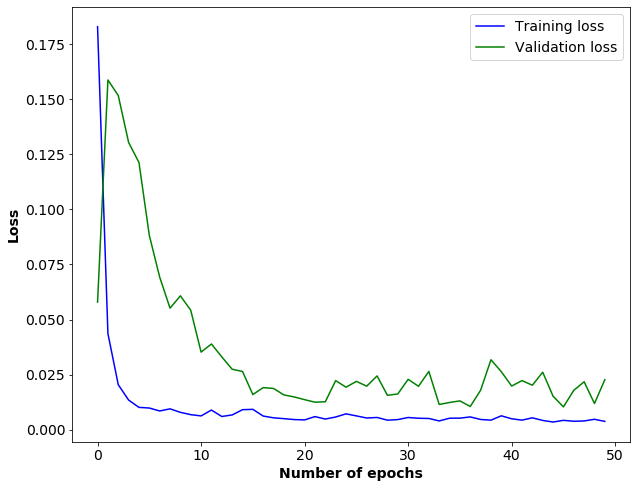

In [23]:
plot_val_train_loss(hist_rnn)

# RNN layer with a GRU layer and recurrent dropout

In [24]:
mod3=Sequential()
mod3.add(keras.layers.GRU(input_shape=(k,P),units = 50, activation='tanh',bias_initializer='zeros',
                          kernel_regularizer = regularizers.l2(0.0),recurrent_dropout=0.1))
mod3.add(Dense(n,activation='tanh'))


In [25]:
mod3.compile(optimizer='adam', loss='mae')
mod3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist_gru1 = mod3.fit(np.array(tr[0]),np.array(tr[1]),epochs = 50, batch_size = 100,
        validation_data=(np.array(val[0]),np.array(val[1])))

Train on 3073 samples, validate on 154 samples
Epoch 1/50
3073/3073 [==============================] - 2s 587us/step - loss: 0.0685 - val_loss: 0.1206
Epoch 2/50
3073/3073 [==============================] - 1s 257us/step - loss: 0.0312 - val_loss: 0.0974
Epoch 3/50
3073/3073 [==============================] - 1s 251us/step - loss: 0.0192 - val_loss: 0.0667
Epoch 4/50
3073/3073 [==============================] - 1s 265us/step - loss: 0.0143 - val_loss: 0.0728
Epoch 5/50
3073/3073 [==============================] - 1s 246us/step - loss: 0.0127 - val_loss: 0.0748
Epoch 6/50
3073/3073 [==============================] - 1s 232us/step - loss: 0.0112 - val_loss: 0.0648
Epoch 7/50
3073/3073 [==============================] - 1s 259us/step - loss: 0.0100 - val_loss: 0.0422
Epoch 8/50
3073/3073 [==============================] - 1s 234us/step - loss: 0.0094 - val_loss: 0.0536
Epoch 9/50
3073/3073 [==============================] - 1s 232us/step - loss: 0.0081 - val_loss: 0.0536
Epoch 10/50
3073/

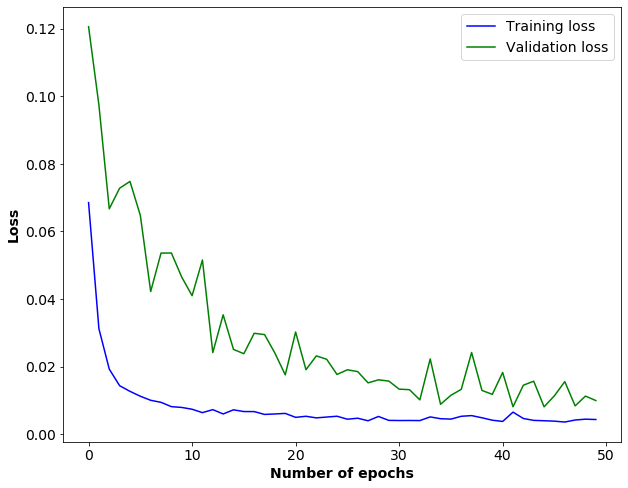

In [27]:
plot_val_train_loss(hist_gru1)

# GRU layer to (5) above with dropout and recurrent dropout

In [28]:
mod4=Sequential()
mod4.add(keras.layers.GRU(input_shape=(k,P),units=50, activation='tanh',bias_initializer='zeros',
                          kernel_regularizer = regularizers.l2(0.0),recurrent_dropout=0.1,return_sequences=True))

#change the units in the second layer
mod4.add(keras.layers.GRU(10,activation='tanh',bias_initializer='zeros',
                          kernel_regularizer = regularizers.l2(0.0),dropout=0.1, recurrent_dropout=0.1))
mod4.add(Dense(n,activation='tanh'))


In [29]:
mod4.compile(optimizer='adam', loss='mae')
mod4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 30, 50)            10050     
_________________________________________________________________
gru_4 (GRU)                  (None, 10)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 11,891
Trainable params: 11,891
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist_gru2 = mod4.fit(np.array(tr[0]),np.array(tr[1]),epochs = 50, batch_size = 100,
        validation_data=(np.array(val[0]),np.array(val[1])))

Train on 3073 samples, validate on 154 samples
Epoch 1/50
3073/3073 [==============================] - 3s 1ms/step - loss: 0.0887 - val_loss: 0.0510
Epoch 2/50
3073/3073 [==============================] - 1s 453us/step - loss: 0.0435 - val_loss: 0.0436
Epoch 3/50
3073/3073 [==============================] - 1s 439us/step - loss: 0.0309 - val_loss: 0.0337
Epoch 4/50
3073/3073 [==============================] - 1s 446us/step - loss: 0.0250 - val_loss: 0.0344
Epoch 5/50
3073/3073 [==============================] - 2s 537us/step - loss: 0.0199 - val_loss: 0.0329
Epoch 6/50
3073/3073 [==============================] - 1s 466us/step - loss: 0.0180 - val_loss: 0.0331
Epoch 7/50
3073/3073 [==============================] - 1s 417us/step - loss: 0.0161 - val_loss: 0.0306
Epoch 8/50
3073/3073 [==============================] - 1s 426us/step - loss: 0.0145 - val_loss: 0.0284
Epoch 9/50
3073/3073 [==============================] - 1s 478us/step - loss: 0.0132 - val_loss: 0.0279
Epoch 10/50
3073/30

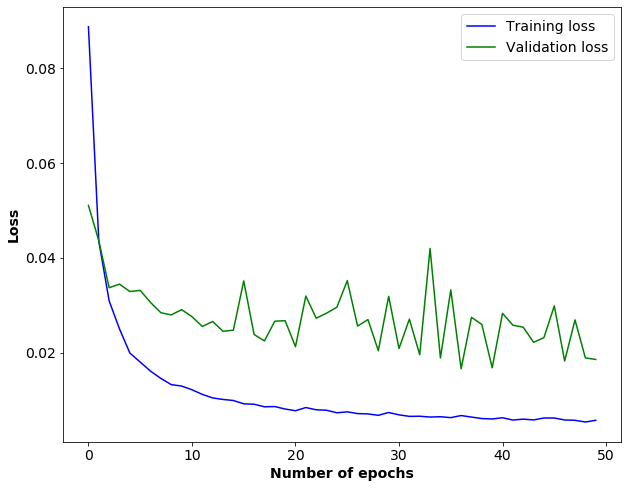

In [31]:
plot_val_train_loss(hist_gru2)

In [32]:
# function to create sarima outputs
def predict_sarima(validation_data,labels_val,model_sarima):
    tr=generate_data_rnn(validation_data,labels_val)
    #print(len(tr[0]))
    predictions=[]
    for j in range(len(tr[0])):
        #print(train_data.shape[0]+28+j)
        #print(train_data.shape[0]+28+j+6)
        try:
            predicted=model_sarima.predict(start=train_data.shape[0],end=train_data.shape[0]+28+j+6)
            #print(len(predicted))
            predictions.extend(list(predicted)[28+j:28+j+1])
        except:
            predictions.extend([0]*1)
    return(predictions,tr[1])

In [33]:
import statsmodels.api as sm
#from statsmodels.tsa.sarima_model import SARIMA
model_sarima=sm.tsa.statespace.SARIMAX(endog=data_base['Price'],order=(0,1,0),seasonal_order=(0,0,0,0),trend='c',enforce_invertibility=False)
results=model_sarima.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                 3468
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -22865.849
Date:                Sun, 26 Jan 2020   AIC                          45735.698
Time:                        09:28:37   BIC                          45748.000
Sample:                    01-01-2010   HQIC                         45740.091
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4219      3.016      1.135      0.257      -2.489       9.333
sigma2      3.134e+04    142.034    220.661      0.000    3.11e+04    3.16e+04
Ljung-Box (Q):                      482.77   Jarque-

/Users/devil/opt/miniconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
predicted_sarima,val_output=predict_sarima(np.array(validation_data),labels_val,model_sarima)
predicted_sarima_train,train_output=predict_sarima(np.array(train_data),labels,model_sarima)

In [35]:
# training loss SARIMA
print('Training loss for SARIMA model')
print(np.mean(abs(predicted_sarima_train-np.array(train_output).flatten())))
print('')
# validation loss SARIMA
print('Validation loss for SARIMA model')
print(np.mean(abs(predicted_sarima-np.array(val_output).flatten())))

Training loss for SARIMA model
0.062154545906804394

Validation loss for SARIMA model
0.3015457355626952


# Test Neural Network

In [36]:
#simple neural network
predicted_test_1=mod_simple.predict(np.array(test_dat[0]))
predicted_train_1=mod_simple.predict(np.array(tr[0]))
# the test MAE loss is
print('Test MAE for Simple Neural Network with 2 dense layers:')
print(np.mean(abs(predicted_test_1.flatten()-np.array(test_dat[1]).flatten())))
print('Train MAE for Simple Neural Network with 2 dense layers:')
print(np.mean(abs(predicted_train_1.flatten()-np.array(tr[1]).flatten())))
print('')
# the rmse is
print('Test RMSE for Simple neural network with 2 dense layers:')
print(np.sqrt(np.mean((predicted_test_1.flatten()-np.array(test_dat[1]).flatten())**2)))
print('Train RMSE for Simple neural network with 2 dense layers:')
print(np.sqrt(np.mean((predicted_train_1.flatten()-np.array(tr[1]).flatten())**2)))

Test MAE for Simple Neural Network with 2 dense layers:
0.031436935999121646
Train MAE for Simple Neural Network with 2 dense layers:
0.01120498010818442

Test RMSE for Simple neural network with 2 dense layers:
0.042611440030119574
Train RMSE for Simple neural network with 2 dense layers:
0.020164437191170323


# Test LSTM

In [37]:
# lstm
predicted_test_2=mod.predict(np.array(test_dat[0]))
predicted_train_2=mod.predict(np.array(tr[0]))
# the test MAE loss is
print('Test MAE for LSTM:')
print(np.mean(abs(predicted_test_2.flatten()-np.array(test_dat[1]).flatten())))
print('Train MAE for LSTM:')
print(np.mean(abs(predicted_train_2.flatten()-np.array(tr[1]).flatten())))
print('')
# the rmse is
print('Test RMSE for LSTM:')
print(np.sqrt(np.mean((predicted_test_2.flatten()-np.array(test_dat[1]).flatten())**2)))
print('Train RMSE for LSTM:')
print(np.sqrt(np.mean((predicted_train_2.flatten()-np.array(tr[1]).flatten())**2)))

Test MAE for LSTM:
0.030530192077178227
Train MAE for LSTM:
0.003663524259634374

Test RMSE for LSTM:
0.035231055985071764
Train RMSE for LSTM:
0.011145059624103983


# Test GRU one layer

In [38]:
#GRU
predicted_test_3=mod2.predict(np.array(test_dat[0]))
predicted_train_3=mod2.predict(np.array(tr[0]))
# the test loss is
print('Test MAE for GRU:')
print(np.mean(abs(predicted_test_3.flatten()-np.array(test_dat[1]).flatten())))
print('Train MAE for GRU:')
print(np.mean(abs(predicted_train_3.flatten()-np.array(tr[1]).flatten())))
print('')
# rmse is 
print('Test RMSE for GRU:')
print(np.sqrt(np.mean((predicted_test_3.flatten()-np.array(test_dat[1]).flatten())**2)))
print('Train RMSE for GRU:')
print(np.sqrt(np.mean((predicted_train_3.flatten()-np.array(tr[1]).flatten())**2)))

Test MAE for GRU:
0.023930403840325236
Train MAE for GRU:
0.004373702106342181

Test RMSE for GRU:
0.02647635828211942
Train RMSE for GRU:
0.010355180980372638


# Test GRU one layer with recurrent dropout

In [39]:
#GRU
predicted_test_4=mod3.predict(np.array(test_dat[0]))
predicted_train_4=mod3.predict(np.array(tr[0]))
# the test loss is
print('Test MAE for GRU with recurrent:')
print(np.mean(abs(predicted_test_4.flatten()-np.array(test_dat[1]).flatten())))
print('Train MAE for GRU with recurrent:')
print(np.mean(abs(predicted_train_4.flatten()-np.array(tr[1]).flatten())))
print('')
# rmse is 
print('Test RMSE for GRU with recurrent:')
print(np.sqrt(np.mean((predicted_test_4.flatten()-np.array(test_dat[1]).flatten())**2)))
print('Train RMSE for GRU with recurrent:')
print(np.sqrt(np.mean((predicted_train_4.flatten()-np.array(tr[1]).flatten())**2)))

Test MAE for GRU with recurrent:
0.015309026184938736
Train MAE for GRU with recurrent:
0.004463884521250186

Test RMSE for GRU with recurrent:
0.019859299602031092
Train RMSE for GRU with recurrent:
0.012699888095072382


# Test GRU two layer with dropout and recurrent dropout

In [40]:
#GRU
predicted_test_5=mod4.predict(np.array(test_dat[0]))
predicted_train_5=mod4.predict(np.array(tr[0]))
# the test loss is
print('Test MAE for GRU 2 layer with recurrent:')
print(np.mean(abs(predicted_test_5.flatten()-np.array(test_dat[1]).flatten())))
print('Train MAE for GRU 2 layer with recurrent:')
print(np.mean(abs(predicted_train_5.flatten()-np.array(tr[1]).flatten())))
print('')
# rmse is 
print('Test RMSE for GRU 2 layer with recurrent:')
print(np.sqrt(np.mean((predicted_test_5.flatten()-np.array(test_dat[1]).flatten())**2)))
print('Train RMSE for GRU 2 layer with recurrent:')
print(np.sqrt(np.mean((predicted_train_5.flatten()-np.array(tr[1]).flatten())**2)))

Test MAE for GRU 2 layer with recurrent:
0.026643360765478432
Train MAE for GRU 2 layer with recurrent:
0.004179224246893308

Test RMSE for GRU 2 layer with recurrent:
0.030157399444670756
Train RMSE for GRU 2 layer with recurrent:
0.014350887039405439


In [41]:
#Sarima
predicted_sarima_train,train_output=predict_sarima(np.array(tr[1]),labels,model_sarima)

# the test MAE loss is
print('Test MAE for SArima Model:')
print(np.mean(abs(predicted_sarima_train-np.array(train_output).flatten())))
print('')
# the rmse is
print('Test RMSE for SArima Model:')
print(np.sqrt(np.mean((predicted_sarima_train-np.array(train_output).flatten())**2)))

Test MAE for SArima Model:
0.05927091445438403

Test RMSE for SArima Model:
0.15319504003579756


In [42]:
predicted_test_4=mod3.predict(np.array(test_dat[0])).flatten()*(maxima-minima)+minima
test_df = data_base.loc[data_base.index>'2018-12-31']
test_df['model_predictions']=[np.nan]*(test_df.shape[0]-predicted_test_4.shape[0])+list(predicted_test_4)
test_df.head(40)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,vix,Dollar index,Gold,2_yr_yield,10_yr_yield,Rip_price,model_predictions
Date,,,,,,,,,,,,,,,,,
2019-01-01,3718.28,-0.036388,262156.0,0.233783,16.135951,4.139601e+07,11.0,17455787.5,-22.116965,-0.001242,21.46,96.169998,1279.00,2.48,2.69,0.369581,NaN
2019-01-02,3849.62,0.035323,235962.0,0.627516,11.263483,4.157532e+07,11.0,17457650.0,-22.649082,0.008492,16.14,96.820000,1282.90,2.50,2.66,0.352706,NaN
2019-01-03,3918.98,0.018017,271254.0,0.518371,18.195239,4.190695e+07,11.0,17459537.5,-29.554199,0.001268,13.57,96.309998,1290.45,2.39,2.56,0.364771,NaN
2019-01-04,3807.55,-0.028433,287236.0,0.223630,19.071180,4.178172e+07,11.0,17461475.0,-25.676786,-0.024757,13.40,96.190002,1279.90,2.50,2.67,0.375243,NaN
2019-01-05,3845.39,0.009938,283639.0,0.977177,19.356800,4.167092e+07,11.0,17463337.5,-25.093221,-0.024757,14.80,96.190002,1279.90,2.50,2.67,0.360224,NaN
2019-01-06,3819.95,-0.006616,269800.0,1.033216,12.551464,4.317036e+07,11.0,17465375.0,-20.517090,-0.024757,14.80,96.190002,1279.90,2.50,2.67,0.356747,NaN
2019-01-07,4070.99,0.065718,251626.0,0.097578,16.277360,4.241399e+07,11.0,17467137.5,-35.355526,0.034336,14.80,95.709999,1292.20,2.53,2.70,0.355275,NaN
2019-01-08,4027.17,-0.010764,288395.0,0.065846,24.302632,4.185539e+07,11.0,17468900.0,-40.725026,0.007010,14.80,95.900002,1286.45,2.58,2.73,0.368395,NaN
2019-01-09,4012.91,-0.003541,317835.0,1.272192,20.662824,4.265339e+07,11.0,17471012.5,-41.963308,0.009695,14.80,95.220001,1288.60,2.56,2.74,0.364347,NaN


In [43]:
predicted_test_5=mod4.predict(np.array(test_dat[0])).flatten()*(maxima-minima)+minima
predicted_test_4=mod3.predict(np.array(test_dat[0])).flatten()*(maxima-minima)+minima
predicted_test_3=mod2.predict(np.array(test_dat[0])).flatten()*(maxima-minima)+minima
predicted_test_2=mod.predict(np.array(test_dat[0])).flatten()*(maxima-minima)+minima
predicted_test_1=mod_simple.predict(np.array(test_dat[0])).flatten()*(maxima-minima)+minima
test_df['pred_GRU_2layer']=[np.nan]*(test_df.shape[0]-predicted_test_5.shape[0])+list(predicted_test_5)
test_df['pred_GRU_1layer_recurrent']=[np.nan]*(test_df.shape[0]-predicted_test_4.shape[0])+list(predicted_test_4)
test_df['pred_GRU_1layer']=[np.nan]*(test_df.shape[0]-predicted_test_3.shape[0])+list(predicted_test_3)
test_df['pred_LSTMlayer']=[np.nan]*(test_df.shape[0]-predicted_test_2.shape[0])+list(predicted_test_2)
test_df['pred_NN']=[np.nan]*(test_df.shape[0]-predicted_test_1.shape[0])+list(predicted_test_1)

In [44]:
test_df_new = test_df.dropna()
test_df_new.head()

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,Gold,2_yr_yield,10_yr_yield,Rip_price,model_predictions,pred_GRU_2layer,pred_GRU_1layer_recurrent,pred_GRU_1layer,pred_LSTMlayer,pred_NN
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,3458.48,0.014684,326464.0,0.211243,21.717215,4.215972e+07,11.0,17510412.5,9.883764,0.015549,...,1323.25,2.45,2.63,0.289558,3712.390137,4163.758301,3712.390137,3929.295410,4266.452148,4136.381836
2019-02-01,3429.25,-0.008452,355463.0,0.014695,30.630137,4.179091e+07,11.0,17512350.0,10.563320,0.008597,...,1318.70,2.52,2.70,0.320461,3737.863281,4188.783203,3737.863281,3951.767334,4213.014160,4263.044922
2019-02-02,3453.89,0.007185,336458.0,0.246119,31.373302,4.254883e+07,11.0,17514325.0,8.017052,0.008597,...,1318.70,2.52,2.70,0.310036,3773.376221,4171.555176,3773.376221,4017.908936,4210.121582,4091.601074
2019-02-03,3474.95,0.006097,326778.0,0.149028,18.974034,4.222722e+07,11.0,17516125.0,3.273010,0.008597,...,1318.70,2.52,2.70,0.308517,3799.155762,4178.170410,3799.155762,4067.899658,4219.685547,4046.557617
2019-02-04,3432.83,-0.012121,296693.0,0.090358,14.588050,4.220107e+07,11.0,17517850.0,1.628575,0.000899,...,1312.15,2.53,2.73,0.310912,3806.519775,4166.799805,3806.519775,4083.773682,4230.622070,3938.210205


In [45]:
dataset = test_df[['model_predictions', 'Price']]
dataset = dataset.dropna()
dataset = dataset/dataset.iloc[0]
dataset.head()

,model_predictions,Price
Date,,
2019-01-31,1.000000,1.000000
2019-02-01,1.006862,0.991548
2019-02-02,1.016428,0.998673
2019-02-03,1.023372,1.004762
2019-02-04,1.025356,0.992583


In [46]:
test_df['position'] = test_df['model_predictions'] - test_df['Price'].shift(1)
test_df= test_df.dropna()
test_df.head(40)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,2_yr_yield,10_yr_yield,Rip_price,model_predictions,pred_GRU_2layer,pred_GRU_1layer_recurrent,pred_GRU_1layer,pred_LSTMlayer,pred_NN,position
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,3458.48,0.014684,326464.0,0.211243,21.717215,4.215972e+07,11.0,17510412.5,9.883764,0.015549,...,2.45,2.63,0.289558,3712.390137,4163.758301,3712.390137,3929.295410,4266.452148,4136.381836,303.960137
2019-02-01,3429.25,-0.008452,355463.0,0.014695,30.630137,4.179091e+07,11.0,17512350.0,10.563320,0.008597,...,2.52,2.70,0.320461,3737.863281,4188.783203,3737.863281,3951.767334,4213.014160,4263.044922,279.383281
2019-02-02,3453.89,0.007185,336458.0,0.246119,31.373302,4.254883e+07,11.0,17514325.0,8.017052,0.008597,...,2.52,2.70,0.310036,3773.376221,4171.555176,3773.376221,4017.908936,4210.121582,4091.601074,344.126221
2019-02-03,3474.95,0.006097,326778.0,0.149028,18.974034,4.222722e+07,11.0,17516125.0,3.273010,0.008597,...,2.52,2.70,0.308517,3799.155762,4178.170410,3799.155762,4067.899658,4219.685547,4046.557617,345.265762
2019-02-04,3432.83,-0.012121,296693.0,0.090358,14.588050,4.220107e+07,11.0,17517850.0,1.628575,0.000899,...,2.53,2.73,0.310912,3806.519775,4166.799805,3806.519775,4083.773682,4230.622070,3938.210205,331.569775
2019-02-05,3429.09,-0.001089,333283.0,0.339495,16.994612,4.228365e+07,11.0,17519687.5,-0.627736,0.006776,...,2.53,2.71,0.302352,3747.475098,4161.761719,3747.475098,4038.119629,4234.936523,3826.637207,314.645098
2019-02-06,3448.29,0.005599,355737.0,0.232808,17.195702,4.232495e+07,11.0,17521525.0,-4.765200,0.004708,...,2.52,2.70,0.300198,3721.724609,4158.509277,3721.724609,3956.902588,4276.166992,3993.770752,292.634609
2019-02-07,3380.94,-0.019531,349536.0,1.107968,21.841382,4.348114e+07,11.0,17523575.0,-3.145345,-0.002224,...,2.48,2.65,0.299239,3767.190918,4203.826172,3767.190918,3997.200195,4313.402344,4281.972656,318.900918
2019-02-08,3373.17,-0.002298,348852.0,1.077033,16.747219,4.426570e+07,11.0,17525750.0,-1.533084,-0.009357,...,2.45,2.63,0.290727,3705.718506,4175.791016,3705.718506,3915.803223,4272.011230,4220.086914,324.778506


In [47]:
test_df['signal'] = test_df['position'].apply(lambda x: np.sign(x))

In [48]:
new_data = test_df.dropna(subset=['signal'],axis=0)
new_data.tail(50)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,10_yr_yield,Rip_price,model_predictions,pred_GRU_2layer,pred_GRU_1layer_recurrent,pred_GRU_1layer,pred_LSTMlayer,pred_NN,position,signal
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-12,7045.63,0.113721,342883.0,1.077638,123.972894,4.588181e+07,20.0,17695050.0,-123.380040,-0.003021,...,2.47,0.300387,6446.275391,6689.140625,6446.275391,6761.063477,6534.709473,6285.265625,120.065391,1.0
2019-05-13,7070.34,0.003507,335989.0,0.565801,102.324007,4.726207e+07,20.0,17697025.0,-154.574009,0.003720,...,2.40,0.324543,7119.225098,7153.198730,7119.225098,7376.702637,6865.156738,6280.290039,73.595098,1.0
2019-05-14,7659.14,0.083277,395645.0,0.309751,113.564959,4.802360e+07,20.0,17699112.5,-207.721147,-0.024131,...,2.42,0.310074,7154.369629,7297.921875,7154.369629,7451.104004,6989.452148,6392.423340,84.029629,1.0
2019-05-15,7976.19,0.041395,365851.0,0.538708,133.521443,4.921348e+07,20.0,17701012.5,-252.924947,0.008016,...,2.37,0.325475,7741.784180,7715.709473,7741.784180,8021.028809,7395.359863,6800.017578,82.644180,1.0
2019-05-16,8123.48,0.018466,367770.0,0.773800,195.702997,4.907069e+07,20.0,17702875.0,-276.099302,0.005839,...,2.40,0.409062,7968.733398,8074.738281,7968.733398,8160.006836,7607.589355,6874.837402,-7.456602,-1.0
2019-05-17,7949.55,-0.021411,376404.0,1.035597,227.033416,4.888031e+07,20.0,17704700.0,-258.718408,0.008895,...,2.39,0.456005,8142.184082,8305.131836,8142.184082,8412.649414,7831.922363,6929.895996,18.704082,1.0
2019-05-18,7324.00,-0.078690,361101.0,1.276177,226.436861,5.011779e+07,20.0,17706587.5,-179.943524,0.008895,...,2.39,0.419707,7991.019043,8283.083008,7991.019043,8333.218750,7937.493652,6795.263184,41.469043,1.0
2019-05-19,7309.12,-0.002032,356488.0,1.320501,131.447797,5.121515e+07,20.0,17708500.0,-104.536015,0.008895,...,2.39,0.386193,7412.639160,7859.702637,7412.639160,7846.873535,7791.259766,7158.106934,88.639160,1.0
2019-05-20,7984.74,0.092435,349370.0,0.080836,127.385159,5.145598e+07,20.0,17710537.5,-83.459888,-0.005837,...,2.41,0.372736,7368.185547,7705.595215,7368.185547,7747.993652,7738.233887,7165.532715,59.065547,1.0


In [49]:
#Implementing Long short strategy
new_data['true_returns'] = new_data['Bitcoin_lag_daily_Returns']*new_data['signal']
new_data['total_val'] = new_data['true_returns'].apply(lambda x: 1 + abs(x))
new_data['portfolio_value']=new_data['total_val']*new_data['total_val'].shift(1).fillna(1)
new_data.tail(40)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,pred_GRU_2layer,pred_GRU_1layer_recurrent,pred_GRU_1layer,pred_LSTMlayer,pred_NN,position,signal,true_returns,total_val,portfolio_value
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-22,7947.65,0.000671,381806.0,0.594945,205.511567,5.122350e+07,20.0,17714462.5,-24.129866,0.008496,...,8101.422363,7925.122070,8237.416016,8114.772461,7608.328125,-17.197930,-1.0,-0.000671,1.000671,1.005987
2019-05-23,7700.18,-0.031138,394425.0,0.157597,174.005387,5.208313e+07,20.0,17716550.0,20.173098,-0.002824,...,8118.565430,7876.110352,8197.708984,8119.319824,7403.702637,-71.539648,-1.0,0.031138,1.031138,1.031829
2019-05-24,7799.53,0.012902,386371.0,0.222639,160.865624,5.265704e+07,20.0,17718525.0,45.162312,-0.011914,...,7965.662598,7693.478027,8119.331055,8046.108398,7269.350098,-6.701973,-1.0,-0.012902,1.012902,1.044442
2019-05-25,7991.15,0.024568,375251.0,0.701117,192.851023,5.275490e+07,20.0,17720437.5,47.767244,-0.011914,...,7984.299316,7787.320312,8196.895508,8055.479980,7528.776367,-12.209687,-1.0,-0.024568,1.024568,1.037787
2019-05-26,8055.78,0.008088,336725.0,0.415335,127.132312,5.213594e+07,20.0,17722187.5,45.049696,-0.011914,...,8088.123047,7923.764160,8291.148438,8075.354004,7932.954102,-67.385840,-1.0,-0.008088,1.008088,1.032855
2019-05-27,8539.02,0.059987,378170.0,0.546923,97.240131,5.223116e+07,20.0,17724250.0,14.627525,-0.011914,...,8125.276855,7969.043945,8368.200195,8043.780762,7592.067871,-86.736055,-1.0,-0.059987,1.059987,1.068560
2019-05-28,8788.72,0.029242,397362.0,0.064514,188.786046,5.251684e+07,20.0,17726337.5,-16.178764,0.001354,...,8419.023438,8369.706055,8681.515625,8204.677734,7855.411133,-169.313945,-1.0,-0.029242,1.029242,1.090983
2019-05-29,8689.91,-0.011243,388163.0,0.265615,192.457780,5.304058e+07,20.0,17728387.5,-25.997773,-0.008376,...,8674.364258,8597.384766,8898.980469,8357.317383,8038.416016,-191.335234,-1.0,0.011243,1.011243,1.040814
2019-05-30,8633.71,-0.006467,405680.0,0.416945,187.323601,5.337387e+07,20.0,17730562.5,-22.783087,-0.006912,...,8697.361328,8548.731445,8957.806641,8406.553711,8133.583984,-141.178555,-1.0,0.006467,1.006467,1.017783


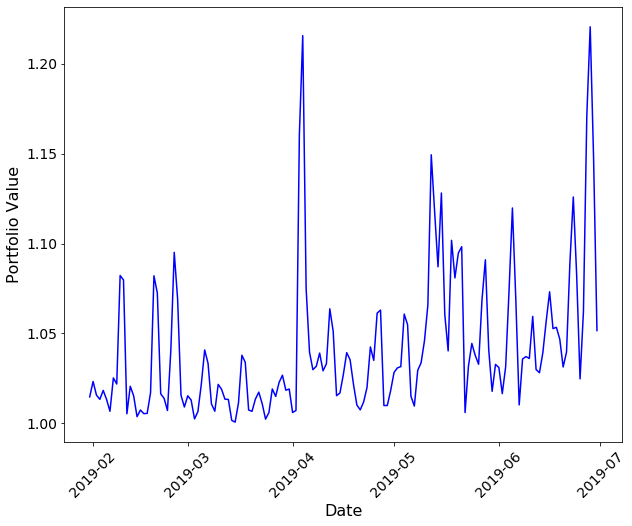

In [50]:
#new_data.index=new_data.Date
plt.figure(figsize= (10,8))
    
csfont = {'fontname':'Helvetica'}
hfont = {'fontname':'Helvetica'}
#plt.plot(new_data['total_val'].cumprod())
plt.plot(new_data['portfolio_value'], 'b-')
plt.ylabel('Portfolio Value',fontsize = 16)
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)
#plt.title('Portfolio value with time', fontsize = 18)
plt.show()

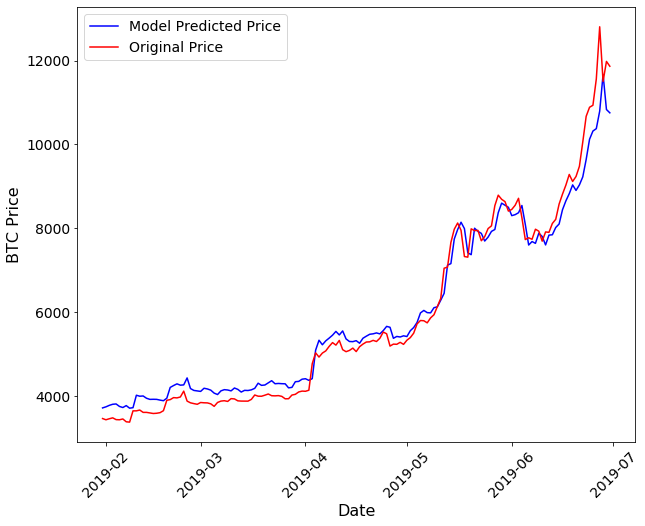

In [51]:
plt.figure(figsize= (10,8))
    
csfont = {'fontname':'Helvetica'}
hfont = {'fontname':'Helvetica'}
plt.plot(test_df['model_predictions'],'b-', label='Model Predicted Price')
plt.plot(test_df['Price'], 'r-', label='Original Price')
plt.ylabel('BTC Price',fontsize = 16)
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})
#plt.legend((test_df['model_predictions'], test_df['Price']), ('Model Predicted Price', 'Original Price'))
#plt.title('Model Prediction', fontsize = 18)
plt.show()

# Buy Sell

In [52]:
signal_2=new_data['signal'].values
first_buy=np.argmax(new_data['signal'].values)
if first_buy>0:
    signal_2[0:(first_buy-1)]=0
new_data['signal_2']=signal_2

In [53]:
new_data.tail(50)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,pred_GRU_1layer_recurrent,pred_GRU_1layer,pred_LSTMlayer,pred_NN,position,signal,true_returns,total_val,portfolio_value,signal_2
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-12,7045.63,0.113721,342883.0,1.077638,123.972894,4.588181e+07,20.0,17695050.0,-123.380040,-0.003021,...,6446.275391,6761.063477,6534.709473,6285.265625,120.065391,1.0,0.113721,1.113721,1.149378,1.0
2019-05-13,7070.34,0.003507,335989.0,0.565801,102.324007,4.726207e+07,20.0,17697025.0,-154.574009,0.003720,...,7119.225098,7376.702637,6865.156738,6280.290039,73.595098,1.0,0.003507,1.003507,1.117627,1.0
2019-05-14,7659.14,0.083277,395645.0,0.309751,113.564959,4.802360e+07,20.0,17699112.5,-207.721147,-0.024131,...,7154.369629,7451.104004,6989.452148,6392.423340,84.029629,1.0,0.083277,1.083277,1.087077,1.0
2019-05-15,7976.19,0.041395,365851.0,0.538708,133.521443,4.921348e+07,20.0,17701012.5,-252.924947,0.008016,...,7741.784180,8021.028809,7395.359863,6800.017578,82.644180,1.0,0.041395,1.041395,1.128120,1.0
2019-05-16,8123.48,0.018466,367770.0,0.773800,195.702997,4.907069e+07,20.0,17702875.0,-276.099302,0.005839,...,7968.733398,8160.006836,7607.589355,6874.837402,-7.456602,-1.0,-0.018466,1.018466,1.060626,-1.0
2019-05-17,7949.55,-0.021411,376404.0,1.035597,227.033416,4.888031e+07,20.0,17704700.0,-258.718408,0.008895,...,8142.184082,8412.649414,7831.922363,6929.895996,18.704082,1.0,-0.021411,1.021411,1.040272,1.0
2019-05-18,7324.00,-0.078690,361101.0,1.276177,226.436861,5.011779e+07,20.0,17706587.5,-179.943524,0.008895,...,7991.019043,8333.218750,7937.493652,6795.263184,41.469043,1.0,-0.078690,1.078690,1.101786,1.0
2019-05-19,7309.12,-0.002032,356488.0,1.320501,131.447797,5.121515e+07,20.0,17708500.0,-104.536015,0.008895,...,7412.639160,7846.873535,7791.259766,7158.106934,88.639160,1.0,-0.002032,1.002032,1.080882,1.0
2019-05-20,7984.74,0.092435,349370.0,0.080836,127.385159,5.145598e+07,20.0,17710537.5,-83.459888,-0.005837,...,7368.185547,7747.993652,7738.233887,7165.532715,59.065547,1.0,0.092435,1.092435,1.094655,1.0


In [54]:
buy_sell=[]
buy_sell.append(new_data['signal_2'].values[0])
old_val=buy_sell[-1]

for j in new_data['signal_2'].values[1:]:
    if j!=old_val:
        buy_sell.append(j)
        old_val=j
    else:
        buy_sell.append(0)
        
new_data['buy_sell']=buy_sell 

In [55]:
new_data.tail(50)

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,pred_GRU_1layer,pred_LSTMlayer,pred_NN,position,signal,true_returns,total_val,portfolio_value,signal_2,buy_sell
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-12,7045.63,0.113721,342883.0,1.077638,123.972894,4.588181e+07,20.0,17695050.0,-123.380040,-0.003021,...,6761.063477,6534.709473,6285.265625,120.065391,1.0,0.113721,1.113721,1.149378,1.0,0.0
2019-05-13,7070.34,0.003507,335989.0,0.565801,102.324007,4.726207e+07,20.0,17697025.0,-154.574009,0.003720,...,7376.702637,6865.156738,6280.290039,73.595098,1.0,0.003507,1.003507,1.117627,1.0,0.0
2019-05-14,7659.14,0.083277,395645.0,0.309751,113.564959,4.802360e+07,20.0,17699112.5,-207.721147,-0.024131,...,7451.104004,6989.452148,6392.423340,84.029629,1.0,0.083277,1.083277,1.087077,1.0,0.0
2019-05-15,7976.19,0.041395,365851.0,0.538708,133.521443,4.921348e+07,20.0,17701012.5,-252.924947,0.008016,...,8021.028809,7395.359863,6800.017578,82.644180,1.0,0.041395,1.041395,1.128120,1.0,0.0
2019-05-16,8123.48,0.018466,367770.0,0.773800,195.702997,4.907069e+07,20.0,17702875.0,-276.099302,0.005839,...,8160.006836,7607.589355,6874.837402,-7.456602,-1.0,-0.018466,1.018466,1.060626,-1.0,-1.0
2019-05-17,7949.55,-0.021411,376404.0,1.035597,227.033416,4.888031e+07,20.0,17704700.0,-258.718408,0.008895,...,8412.649414,7831.922363,6929.895996,18.704082,1.0,-0.021411,1.021411,1.040272,1.0,1.0
2019-05-18,7324.00,-0.078690,361101.0,1.276177,226.436861,5.011779e+07,20.0,17706587.5,-179.943524,0.008895,...,8333.218750,7937.493652,6795.263184,41.469043,1.0,-0.078690,1.078690,1.101786,1.0,0.0
2019-05-19,7309.12,-0.002032,356488.0,1.320501,131.447797,5.121515e+07,20.0,17708500.0,-104.536015,0.008895,...,7846.873535,7791.259766,7158.106934,88.639160,1.0,-0.002032,1.002032,1.080882,1.0,0.0
2019-05-20,7984.74,0.092435,349370.0,0.080836,127.385159,5.145598e+07,20.0,17710537.5,-83.459888,-0.005837,...,7747.993652,7738.233887,7165.532715,59.065547,1.0,0.092435,1.092435,1.094655,1.0,0.0


In [56]:
money=[1]
coins=[0]
price=new_data['Price'].values
for i,j in enumerate(new_data['buy_sell'].values):
    if j==1:
        coins.append(coins[-1]+money[-1]/price[i])
        money.append(0)
    if j==-1:
        money.append(money[-1]+price[i]*coins[-1])
        coins.append(0)
    if j==0:
        money.append(money[-1])
        coins.append(coins[-1])
portfolio_value=[1]
money=money[1:]
coins=coins[1:]
for i,j in enumerate(new_data['Price'].values):
    portfolio_value.append(money[i]+coins[i]*j-0.008*money[i])
new_data['strategy_2_value']=portfolio_value[1:]

In [57]:
new_data

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,pred_LSTMlayer,pred_NN,position,signal,true_returns,total_val,portfolio_value,signal_2,buy_sell,strategy_2_value
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,3458.48,0.014684,326464.0,0.211243,21.717215,4.215972e+07,11.0,17510412.5,9.883764,0.015549,...,4266.452148,4136.381836,303.960137,1.0,0.014684,1.014684,1.014684,1.0,1.0,1.000000
2019-02-01,3429.25,-0.008452,355463.0,0.014695,30.630137,4.179091e+07,11.0,17512350.0,10.563320,0.008597,...,4213.014160,4263.044922,279.383281,1.0,-0.008452,1.008452,1.023260,1.0,0.0,0.991548
2019-02-02,3453.89,0.007185,336458.0,0.246119,31.373302,4.254883e+07,11.0,17514325.0,8.017052,0.008597,...,4210.121582,4091.601074,344.126221,1.0,0.007185,1.007185,1.015698,1.0,0.0,0.998673
2019-02-03,3474.95,0.006097,326778.0,0.149028,18.974034,4.222722e+07,11.0,17516125.0,3.273010,0.008597,...,4219.685547,4046.557617,345.265762,1.0,0.006097,1.006097,1.013327,1.0,0.0,1.004762
2019-02-04,3432.83,-0.012121,296693.0,0.090358,14.588050,4.220107e+07,11.0,17517850.0,1.628575,0.000899,...,4230.622070,3938.210205,331.569775,1.0,-0.012121,1.012121,1.018292,1.0,0.0,0.992583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-26,11560.24,0.057376,362773.0,2.831801,121.887676,5.782675e+07,23.0,17780562.5,-293.627057,-0.009496,...,9903.375977,9054.739258,-557.997852,-1.0,-0.057376,1.057376,1.061997,-1.0,0.0,2.329511
2019-06-27,12805.72,0.107738,400275.0,1.937800,187.186712,5.719534e+07,23.0,17782625.0,-382.694256,-0.001234,...,10119.120117,8981.944336,-767.774180,-1.0,-0.107738,1.107738,1.171296,-1.0,0.0,2.329511
2019-06-28,11501.06,-0.101881,361736.0,0.691469,200.073189,5.761983e+07,23.0,17784400.0,-322.890003,0.003823,...,10593.793945,9336.813477,-1139.375273,-1.0,0.101881,1.101881,1.220596,-1.0,0.0,2.329511


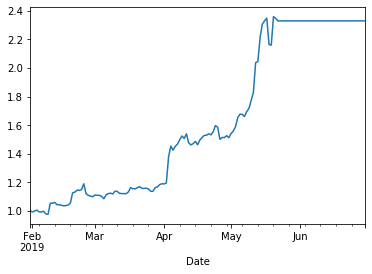

In [58]:
new_data['strategy_2_value'].plot()
plt.show()

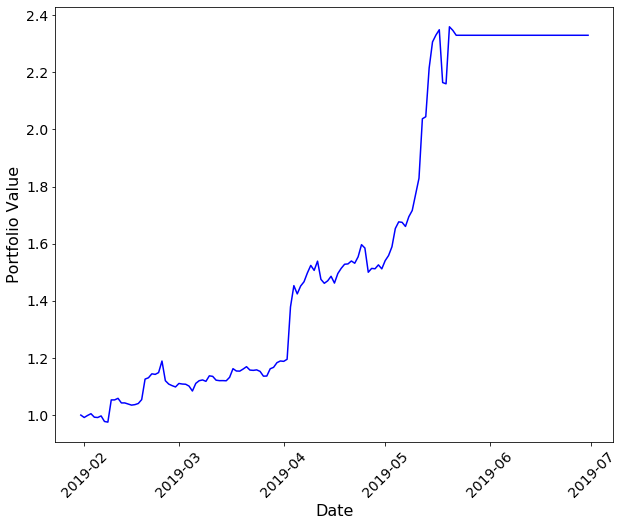

In [59]:
plt.figure(figsize= (10,8))
    
csfont = {'fontname':'Helvetica'}
hfont = {'fontname':'Helvetica'}
plt.plot(new_data['strategy_2_value'],'b-')
plt.ylabel('Portfolio Value',fontsize = 16)
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)
#plt.legend(loc=2, prop={'size': 14})
#plt.legend((test_df['model_predictions'], test_df['Price']), ('Model Predicted Price', 'Original Price'))
#plt.title('Portfolio value with time ', fontsize = 18)
plt.show()

In [60]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "RMSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "RMSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(np.sqrt((actual - p1)**2))
            e2_lst.append(np.sqrt((actual - p2)**2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [61]:
test_df_new.tail()

,Price,Bitcoin_lag_daily_Returns,Daily_Transaction_Volume,Price_volatility,Transaction_Fees,Hash_rate,Google_trend,Money_supply,MACD_Histogram,lag_Returns S&P 500,...,Gold,2_yr_yield,10_yr_yield,Rip_price,model_predictions,pred_GRU_2layer,pred_GRU_1layer_recurrent,pred_GRU_1layer,pred_LSTMlayer,pred_NN
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-26,11560.24,0.057376,362773.0,2.831801,121.887676,5.782675e+07,23.0,17780562.5,-293.627057,-0.009496,...,1403.95,1.77,2.05,0.470088,10374.952148,10430.363281,10374.952148,10639.081055,9903.375977,9054.739258
2019-06-27,12805.72,0.107738,400275.0,1.937800,187.186712,5.719534e+07,23.0,17782625.0,-382.694256,-0.001234,...,1402.50,1.74,2.01,0.468229,10792.465820,10748.820312,10792.465820,11003.449219,10119.120117,8981.944336
2019-06-28,11501.06,-0.101881,361736.0,0.691469,200.073189,5.761983e+07,23.0,17784400.0,-322.890003,0.003823,...,1409.00,1.75,2.00,0.467451,11666.344727,11396.533203,11666.344727,11792.549805,10593.793945,9336.813477
2019-06-29,11979.06,0.041561,402208.0,13.379250,178.312816,5.980643e+07,23.0,17786437.5,-286.153249,0.003823,...,1409.00,1.75,2.00,0.408754,10831.221680,10990.428711,10831.221680,11218.125000,10499.125000,9630.102539
2019-06-30,11863.78,-0.009623,359408.0,0.000000,109.199496,6.219192e+07,23.0,17788612.5,-223.751558,0.003823,...,1409.00,1.75,2.00,0.427315,10752.372070,10924.100586,10752.372070,10740.708008,10234.533203,9659.136719


In [62]:
test_df_new = test_df_new.rename_axis(None)
actual = test_df_new['Price'].tolist()
nn = test_df_new['pred_NN'].tolist()
lstm = test_df_new['pred_LSTMlayer'].tolist()
gru1 = test_df_new['pred_GRU_1layer'].tolist()
gru_recur = test_df_new['pred_GRU_1layer_recurrent'].tolist()
gru2 = test_df_new['pred_GRU_2layer'].tolist()

In [63]:
#rt = dm_test(actual,gru_recur,gru2,h = 1, crit="MAD")
rt1 = dm_test(actual,nn,lstm,h = 1, crit="RMSE")
rt2 = dm_test(actual,lstm,gru1,h = 1, crit="RMSE")
rt3 = dm_test(actual,gru1,gru_recur,h = 1, crit="RMSE")
rt4 = dm_test(actual,gru_recur,gru2,h = 1, crit="RMSE")
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="poly", power=4)
print(rt1, rt2, rt3, rt4)

dm_return(DM=0.5984281729962626, p_value=0.5504568367081631) dm_return(DM=6.1399495022473, p_value=7.050555019345828e-09) dm_return(DM=9.580678938169527, p_value=2.937584122863653e-17) dm_return(DM=-12.706504282464742, p_value=1.4302000962546725e-25)


In [64]:
tr_15=generate_data_rnn(np.array(train_data),labels_train,n,15)
val_15=generate_data_rnn(np.array(validation_data),labels_val,n,15)
test_dat_15=generate_data_rnn(np.array(test_data),labels_test,n,15)

In [65]:
gru_rec_15=Sequential()
gru_rec_15.add(keras.layers.GRU(input_shape=(15,P),units = 50, activation='tanh',bias_initializer='zeros',
                          kernel_regularizer = regularizers.l2(0.0),recurrent_dropout=0.1))
gru_rec_15.add(Dense(n,activation='tanh'))

In [66]:
gru_rec_15.compile(optimizer='adam', loss='mae')
gru_rec_15.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 50)                10050     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________


In [67]:
gru_rec_15.fit(np.array(tr_15[0]),np.array(tr_15[1]),epochs = 50, batch_size = 100,
        validation_data=(np.array(val_15[0]),np.array(val_15[1])))

Train on 3088 samples, validate on 169 samples
Epoch 1/50
3088/3088 [==============================] - 1s 476us/step - loss: 0.0660 - val_loss: 0.1351
Epoch 2/50
3088/3088 [==============================] - 0s 144us/step - loss: 0.0399 - val_loss: 0.1094
Epoch 3/50
3088/3088 [==============================] - 0s 140us/step - loss: 0.0294 - val_loss: 0.1309
Epoch 4/50
3088/3088 [==============================] - 0s 141us/step - loss: 0.0226 - val_loss: 0.1200
Epoch 5/50
3088/3088 [==============================] - 0s 138us/step - loss: 0.0191 - val_loss: 0.1029
Epoch 6/50
3088/3088 [==============================] - 0s 149us/step - loss: 0.0156 - val_loss: 0.0918
Epoch 7/50
3088/3088 [==============================] - 1s 213us/step - loss: 0.0125 - val_loss: 0.0822
Epoch 8/50
3088/3088 [==============================] - 1s 193us/step - loss: 0.0112 - val_loss: 0.0710
Epoch 9/50
3088/3088 [==============================] - 0s 148us/step - loss: 0.0093 - val_loss: 0.0630
Epoch 10/50
3088/

In [68]:
#GRU
pred_gru_rec_15=gru_rec_15.predict(np.array(test_dat_15[0]))
pred_gru_rec_15=gru_rec_15.predict(np.array(tr_15[0]))
# the test loss is
print('Test MAE for GRU with recurrent:')
print(np.mean(abs(pred_gru_rec_15.flatten()-np.array(test_dat_15[1]).flatten())))
print('Train MAE for GRU with recurrent:')
print(np.mean(abs(pred_gru_rec_15.flatten()-np.array(tr_15[1]).flatten())))
print('')
# rmse is 
print('Test RMSE for GRU with recurrent:')
print(np.sqrt(np.mean((pred_gru_rec_15.flatten()-np.array(test_dat_15[1]).flatten())**2)))
print('Train RMSE for GRU with recurrent:')
print(np.sqrt(np.mean((pred_gru_rec_15.flatten()-np.array(tr_15[1]).flatten())**2)))

Test MAE for GRU with recurrent:


ValueError: operands could not be broadcast together with shapes (3088,) (166,) 